In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
#mpl.use('Qt5Agg')
plt.rcParams['figure.dpi'] = 200


# Gaussian Kernel
def gaussian_kernel(x: float, radius: float):
    return np.e**(-(4*x/radius)**2)


# Inverse quad Kernel
def invQuad_kernel(x: float, radius: float):
    return 1/(1+(16*x/radius)**2)


def multiQuad_kernel(x: float, radius: float):
    return np.sqrt(1 + (16*x/radius)**2)

In [16]:
x_0 = np.linspace(-5, 5, 15)
y_0 = np.linspace(-5, 5, 15)
x_0, y_0 = np.meshgrid(x_0, y_0)
#z = np.cosh(x_0 - 0.5) * np.cosh(y_0 - 0.5)
#z = np.sin(np.sqrt(x_0**2 + y_0**2))
z = 1 - abs(x_0+y_0)-abs(y_0-x_0)

pairs = np.asarray([x_0.ravel(), y_0.ravel()]).T

In [17]:
# Inicio del método para la interpolación con RBF
phi_matrix = np.array([multiQuad_kernel(np.linalg.norm(pairs - rbf_pos, axis=1), 10) for rbf_pos in pairs])
f_matrix = z.ravel()
weights_matrix = np.linalg.solve(phi_matrix, f_matrix)

In [18]:
# Función interpolada
def interpolate_RBF(x: float, radius: float):
    temp = 0
    for (rbf_pos, w) in zip(pairs, weights_matrix):
        temp += w * multiQuad_kernel(np.linalg.norm(x - rbf_pos), radius)
    return temp

In [19]:
step = 40
x_RBF = np.linspace(-5, 5, step)
y_RBF = np.linspace(-5, 5, step)

x_RBF, y_RBF = np.meshgrid(x_RBF, y_RBF)

pairs_2 = np.asarray([x_RBF.ravel(), y_RBF.ravel()]).T

In [20]:
z_RBF = [interpolate_RBF(pair, 10) for pair in pairs_2]
z_RBF = np.array_split(z_RBF, x_RBF.shape[0])
z_RBF = np.stack(z_RBF, axis=0)

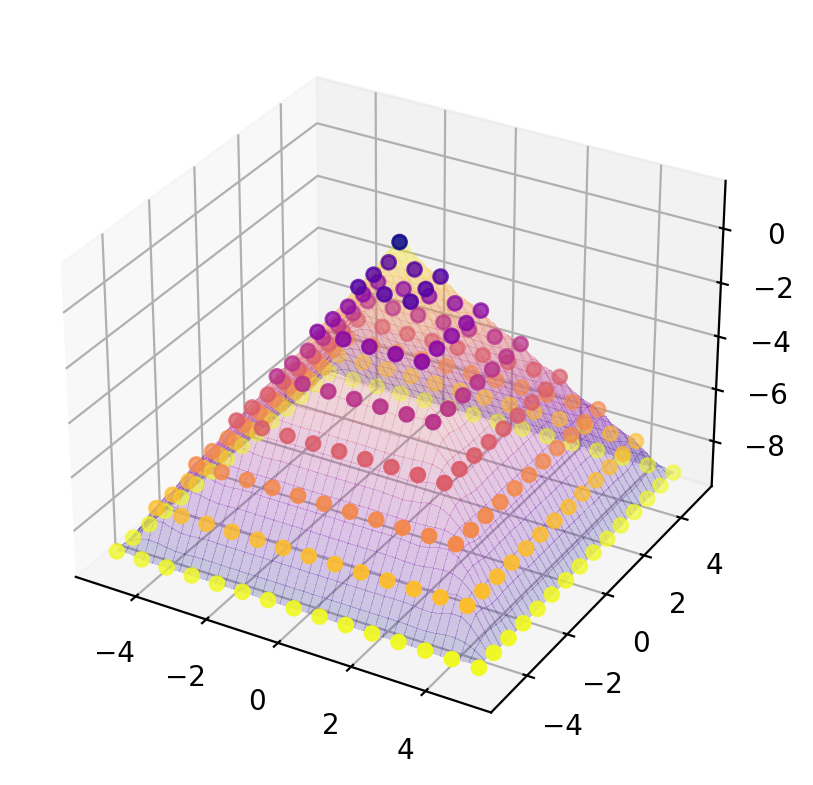

In [21]:
# Plot the surface
ax = plt.axes(projection="3d")
surf = ax.plot_surface(x_RBF, y_RBF, z_RBF, cmap=cm.plasma, linewidth=0, antialiased=False, alpha=0.2, zorder=1)
scat = ax.scatter3D(x_0, y_0, z, s=25, zorder=4, c=z, cmap=cm.plasma_r)
plt.show()